In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('data.csv')
data.head()

,Cl,1,2,3,4,5,6,7,8,9,...,1737,1738,1739,1740,1741,1742,1743,1744,1745,1746
0,426.164519,0.019577,0.019470,0.019452,0.019527,0.019616,0.019666,0.019601,0.019492,0.019548,...,0.105387,0.102081,0.099438,0.099209,0.099076,0.097756,0.097996,0.100103,0.101322,0.099239
1,1003.898635,0.021694,0.021799,0.022051,0.022201,0.022188,0.022018,0.021996,0.022162,0.022117,...,0.118739,0.115712,0.114307,0.113261,0.113702,0.116134,0.117882,0.117496,0.116149,0.115194
2,683.260127,0.020008,0.019946,0.019997,0.020046,0.020002,0.019916,0.019846,0.019805,0.019885,...,0.102475,0.101191,0.099991,0.100175,0.100819,0.100643,0.100813,0.101416,0.100405,0.096126
3,299.401198,0.020367,0.020274,0.020317,0.020518,0.020673,0.020647,0.020365,0.019905,0.019786,...,0.102348,0.102569,0.102520,0.100641,0.099706,0.102169,0.105038,0.105098,0.103568,0.102897
4,454.545455,0.017094,0.017047,0.017022,0.017060,0.017126,0.017203,0.017201,0.017106,0.017164,...,0.091870,0.089006,0.086887,0.086557,0.086041,0.084816,0.085314,0.087352,0.088082,0.086177


In [3]:
data=data.fillna(data['Cl'].mean())

## 1.Using KBest Method

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [6]:
X = data.iloc[:,1:1747]  #independent columns

In [7]:
y = data.iloc[:,0]

In [8]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=500)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(100,'Score'))  #print 10 best features
df = featureScores.nlargest(800,'Score')

In [9]:
features=df['Specs'].to_csv('imp.csv')
features

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

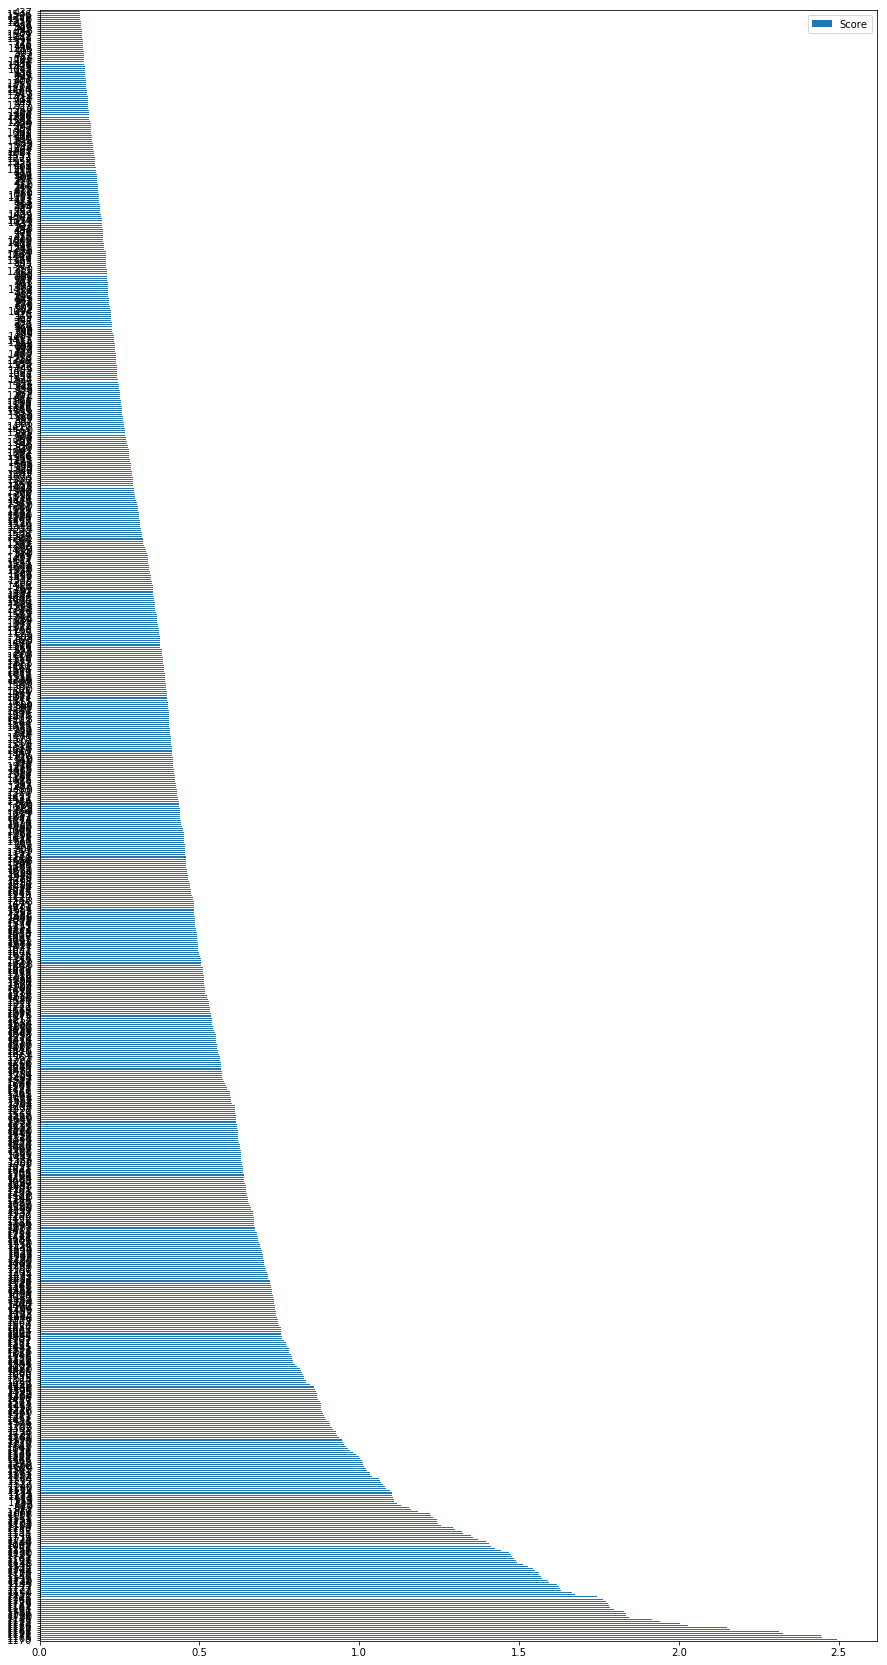

In [10]:
import matplotlib.pyplot as plt
plt.figure()
df.plot(kind='barh',figsize=(15,30))
plt.savefig('Selectkbest.png')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [33]:
y = data.iloc[:,0]
num=[]
MAE=[]
MSE=[]
RMSE=[]
R=[]
for i in range (1100,0,-50):
    df = featureScores.nlargest(i,'Score')
    features=df['Specs'].values
    X = data[features]
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred= regressor.predict(X_test)
    num.append(i)
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    MAE.append(metrics.mean_absolute_error(y_test, y_pred))
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    R.append(metrics.r2_score(y_test, y_pred))

In [42]:
df=featureScores.nlargest(800,'Score')
features=df['Specs'].values
X = data[features]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
len(regressor.coef_)

800

In [14]:
res = pd.DataFrame()

In [15]:
res['Ft']=num
res['MAE']=MAE
res['MSE']=MSE
res['RMSE']=RMSE
res['R^2']=R

In [16]:
df= res.nsmallest(len(res),'RMSE')

In [17]:
df.to_csv('results.csv')

In [18]:
df

,Ft,MAE,MSE,RMSE,R^2
6,800,693.850345,1.037929e+06,1018.787971,0.285094
7,750,708.592755,1.043993e+06,1021.759572,0.280917
5,850,712.645382,1.070516e+06,1034.657270,0.262649
8,700,748.364350,1.118034e+06,1057.371272,0.229919
4,900,700.776032,1.141232e+06,1068.284647,0.213941
1,1050,674.731060,1.177995e+06,1085.354635,0.188619
3,950,714.364955,1.178261e+06,1085.477298,0.188436
0,1100,647.038463,1.198618e+06,1094.813982,0.174415
2,1000,704.610286,1.207873e+06,1099.032758,0.168040
9,650,801.816797,1.266807e+06,1125.525190,0.127447


In [47]:
 x_pred= regressor.predict(X_train)

In [48]:
print("R squared values:")
print("1. Testing: 0.285094")
print("2. Training:", metrics.r2_score(y_train, x_pred))

R squared values:
1. Testing: 0.285094
2. Training: 1.0


Predicting Cl value for a random set of features:

In [21]:
predicted_val = regressor.predict(X_test.iloc[0:1])

In [22]:
print("Testing Value :", X_test.iloc[0:1])

Testing Value :         1171      1170     1172      1173      1169      1168     1174  \
54  0.044741  0.045339  0.04403  0.043375  0.045875  0.046594  0.04294   

        1167      1175      1176  ...      1102      1743      1726      1101  \
54  0.047523  0.042421  0.041637  ...  0.032179  0.101682  0.101578  0.032044   

        1738      1157      1103     1100      1150      1744  
54  0.100694  0.052621  0.032078  0.03155  0.050845  0.099825  

[1 rows x 50 columns]


In [23]:
print("Predicted Cl value : ", predicted_val[0])

Predicted Cl value :  226.06851935977375


Same, can be done for any unknown set of features

In [49]:
print('Regression Coefficients of the model: \n', regressor.coef_)

Regression Coefficients of the model: 
 [-8.18061445e+04 -6.14184854e+04 -5.42297128e+04 -2.41908522e+03
 -1.23134643e+04  3.08550590e+04  1.77785458e+04  5.06188824e+04
  2.42960704e+04  5.64941707e+04  6.18695879e+04  6.71892447e+04
 -1.25280365e+05  4.68885478e+04 -3.48154374e+04  1.77692258e+04
  7.35084737e+03 -1.81861463e+02 -7.52951852e+04 -3.79350876e+04
  3.61780326e+04 -2.54543869e+04 -2.30261336e+04  6.13532527e+04
  6.08938309e+04  2.02709770e+04 -5.83337051e+04  7.34964598e+04
  1.59209374e+04  6.64355224e+04  5.79443547e+04  2.63978729e+04
  7.01469635e+04  3.66120693e+04  4.06325955e+04  2.16249022e+04
 -4.51476453e+04 -2.00813325e+04  3.19283762e+04  5.03010499e+04
  1.94390476e+04 -8.48666097e+04  4.72258969e+04  3.24146038e+04
  1.07587609e+05  1.91502732e+04  1.09424356e+04  3.35456643e+04
  1.26793444e+04 -8.39033399e+02 -6.03253600e+04 -5.44330520e+04
 -3.78507030e+04  1.41117066e+03 -1.26841951e+03 -9.45632779e+03
 -4.60164077e+01  2.37877056e+04 -5.08071769e+04 -

In [28]:
df_coef = pd.DataFrame()

In [29]:
df_coef['coef']=regressor.coef_

In [44]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

In [45]:
len(coeff_df)

800

In [46]:
coeff_df.to_csv("Coefficients.csv")